# CUSTOMER SEGMENTATION

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('data/superstore_dataset2011-2015.csv')
print(data.shape)
data.head()

(51290, 24)


Row ID         Order ID Order Date Ship Date       Ship Mode Customer ID  \
0   42433     AG-2011-2040   1/1/2011  6/1/2011  Standard Class    TB-11280   
1   22253    IN-2011-47883   1/1/2011  8/1/2011  Standard Class    JH-15985   
2   48883     HU-2011-1220   1/1/2011  5/1/2011    Second Class      AT-735   
3   11731  IT-2011-3647632   1/1/2011  5/1/2011    Second Class    EM-14140   
4   22255    IN-2011-47883   1/1/2011  8/1/2011  Standard Class    JH-15985   

     Customer Name      Segment         City            State  ...  \
0  Toby Braunhardt     Consumer  Constantine      Constantine  ...   
1      Joseph Holt     Consumer  Wagga Wagga  New South Wales  ...   
2    Annie Thurman     Consumer     Budapest         Budapest  ...   
3     Eugene Moren  Home Office    Stockholm        Stockholm  ...   
4      Joseph Holt     Consumer  Wagga Wagga  New South Wales  ...   

         Product ID         Category Sub-Category  \
0  OFF-TEN-10000025  Office Supplies      Storage   
1   OFF-SU-10000618  Office Supplies     Supplies   
2  OFF-TEN-10001585  Office Supplies      Storage   
3   OFF-PA-10001492  Office Supplies        Paper   
4   FUR-FU-10003447        Furniture  Furnishings   

                  Product Name    Sales Quantity Discount   Profit  \
0          Tenex Lockers, Blue  408.300        2      0.0  106.140   
1     Acme Trimmer, High Speed  120.366        3      0.1   36.036   
2      Tenex Box, Single Width   66.120        4      0.0   29.640   
3  Enermax Note Cards, Premium   44.865        3      0.5  -26.055   
4   Eldon Light Bulb, Duo Pack  113.670        5      0.1   37.770   

   Shipping Cost  Order Priority  
0          35.46          Medium  
1           9.72          Medium  
2           8.17            High  
3           4.82            High  
4           4.70          Medium  

[5 rows x 24 columns]

## Cleaning

In [3]:
data.loc[data['Country'] == 'Austria', 'Market'] = 'EU'

In [4]:
date_columns = ['Order Date', 'Ship Date']
for col in date_columns:
    data.loc[:, col] = pd.to_datetime(data[col])

## Clustering
### Prepare the customer data

In [5]:
data['Customer Name'].unique()

array(['Toby Braunhardt', 'Joseph Holt', 'Annie Thurman', 'Eugene Moren',
       "Patrick O'Donnell", 'Liz Carlisle', 'David Kendrick',
       'Stephanie Phelps', 'Dave Hallsten', "Patrick O'Brill",
       'Gene Hale', 'Ralph Ritter', 'Ionia McGrath', 'Tom Prescott',
       'Todd Sumrall', 'Ruben Dartt', 'Tom Boeckenhauer',
       'Vicky Freymann', 'Katherine Hughes', 'Dave Brooks',
       'Giulietta Weimer', 'Shahid Collister', 'Bryan Spruell',
       'Chris McAfee', 'Randy Ferguson', 'Logan Haushalter', 'Lori Olson',
       'Ed Ludwig', 'Brian DeCherney', 'Jeremy Farry', 'Edward Hooks',
       'Hallie Redmond', 'Aaron Smayling', 'Benjamin Patterson',
       'Rachel Payne', 'Jennifer Braxton', 'Pete Armstrong',
       'Victoria Pisteka', 'Lynn Smith', 'Kunst Miller',
       'Katharine Harms', 'Adam Bellavance', 'Matt Hagelstein',
       'Dianna Wilson', 'Liz Thompson', 'Mike Caudle', 'Yana Sorensen',
       'Muhammed MacIntyre', 'Nick Zandusky', 'Monica Federle',
       'William Brown

Useful features:
- Market ratios of the Customer
- Total sales amount
- Evolution of sales amount
- Frequency of purchases
- Ratio of product category purchased

In [6]:
groupby_cust_object = data.groupby(by='Customer Name')

#### Market ratios of each customer

All the customers buy from all the 7 different markets, but they probably buy more from one market than for others

In [7]:
def feature_ratios(df, col):
    ratios = df[col].value_counts(normalize=True)
    ratios_df = pd.DataFrame(ratios).T.reset_index(drop=True)
    return ratios_df

In [8]:
# test in one customer
one_customer = data[data['Customer Name'] == 'Aaron Bergman']
one_customer.set_index('Customer Name', inplace=True)
feature_ratios(one_customer, 'Market')

APAC        EU     LATAM      EMEA    Africa        US
0  0.370787  0.269663  0.157303  0.067416  0.067416  0.067416

In [9]:
cust_market_ratios = groupby_cust_object.apply(feature_ratios, 'Market').reset_index(level=1, drop=True)
cust_market_ratios

APAC        EU     LATAM      EMEA    Africa  \
Customer Name                                                          
Aaron Bergman       0.370787  0.269663  0.157303  0.067416  0.067416   
Aaron Hawkins       0.178571  0.178571  0.232143  0.071429  0.142857   
Aaron Smayling      0.083333  0.416667  0.116667  0.100000  0.116667   
Adam Bellavance     0.191176  0.102941  0.279412  0.088235  0.073529   
Adam Hart           0.202381  0.238095  0.083333  0.023810  0.202381   
...                      ...       ...       ...       ...       ...   
Xylona Preis        0.245902  0.098361  0.098361  0.032787  0.065574   
Yana Sorensen       0.080645  0.193548  0.403226  0.096774  0.032258   
Yoseph Carroll      0.107143  0.517857  0.142857       NaN  0.053571   
Zuschuss Carroll    0.176471  0.317647  0.129412       NaN  0.011765   
Zuschuss Donatelli  0.185185  0.259259  0.055556  0.166667  0.166667   

                          US    Canada  
Customer Name                           
Aaron Bergman       0.067416       NaN  
Aaron Hawkins       0.196429       NaN  
Aaron Smayling      0.166667       NaN  
Adam Bellavance     0.264706       NaN  
Adam Hart           0.238095  0.011905  
...                      ...       ...  
Xylona Preis        0.459016       NaN  
Yana Sorensen       0.193548       NaN  
Yoseph Carroll      0.142857  0.035714  
Zuschuss Carroll    0.364706       NaN  
Zuschuss Donatelli  0.166667       NaN  

[795 rows x 7 columns]

In [40]:
cust_market_ratios = cust_market_ratios.fillna(0)

#### Total sales per customer

In [10]:
cust_total_sales = groupby_cust_object.sum()['Sales']
cust_total_sales

Customer Name
Aaron Bergman         24644.62750
Aaron Hawkins         20759.51384
Aaron Smayling        14212.62840
Adam Bellavance       20186.77840
Adam Hart             21718.20142
                         ...     
Xylona Preis          12198.95060
Yana Sorensen         20032.43800
Yoseph Carroll        20164.37760
Zuschuss Carroll      28479.99226
Zuschuss Donatelli    12430.57040
Name: Sales, Length: 795, dtype: float64

#### Ratio of product category

In [11]:
cust_category_ratios = groupby_cust_object.apply(feature_ratios, 'Category').reset_index(level=1, drop=True)
cust_category_ratios

Office Supplies  Technology  Furniture
Customer Name                                             
Aaron Bergman              0.471910    0.325843   0.202247
Aaron Hawkins              0.482143    0.214286   0.303571
Aaron Smayling             0.666667    0.200000   0.133333
Adam Bellavance            0.691176    0.117647   0.191176
Adam Hart                  0.619048    0.178571   0.202381
...                             ...         ...        ...
Xylona Preis               0.688525    0.147541   0.163934
Yana Sorensen              0.645161    0.193548   0.161290
Yoseph Carroll             0.607143    0.160714   0.232143
Zuschuss Carroll           0.611765    0.211765   0.176471
Zuschuss Donatelli         0.462963    0.314815   0.222222

[795 rows x 3 columns]

#### Frequency of purchases

In [12]:
def freq_purchases(df, feature):
    array_timestamps = df[feature].sort_values().unique()
    mean_freq = pd.Series(array_timestamps).diff().mean().seconds
    return mean_freq

In [13]:
freq_purchases(one_customer, 'Order Date')

64800

In [35]:
cust_freq_orders = groupby_cust_object.apply(freq_purchases, 'Order Date')
cust_freq_orders

Customer Name
Aaron Bergman         64800
Aaron Hawkins         44509
Aaron Smayling        60480
Adam Bellavance       54568
Adam Hart             11076
                      ...  
Xylona Preis          14896
Yana Sorensen         31680
Yoseph Carroll        71503
Zuschuss Carroll       9600
Zuschuss Donatelli    24685
Length: 795, dtype: int64

#### Evolution of sales

<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

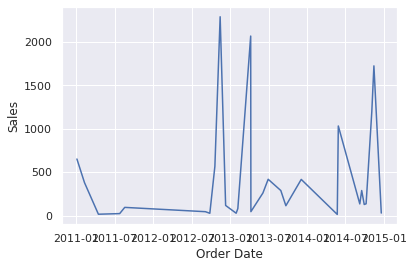

In [15]:
sns.lineplot(x='Order Date', y='Sales', data=data[data['Customer Name'] == 'Vicky Freymann'].groupby('Order Date').sum())

In [16]:
customer_data = data[data['Customer Name'] == 'Dianna Wilson'].groupby('Order Date').sum().sort_index()

customer_data.index.inferred_freq
# plt.plot(customer_data['Sales'])
# customer_data

In [17]:
customer_data.index

DatetimeIndex(['2011-01-06', '2011-02-04', '2011-04-16', '2011-09-11',
               '2011-09-27', '2011-12-09', '2011-12-27', '2012-01-10',
               '2012-02-23', '2012-09-26', '2012-10-05', '2012-10-24',
               '2013-01-08', '2013-03-26', '2013-06-03', '2013-06-05',
               '2013-07-01', '2013-08-21', '2013-08-24', '2013-11-02',
               '2013-11-13', '2014-02-06', '2014-03-20', '2014-05-06',
               '2014-05-28', '2014-06-11', '2014-06-30', '2014-07-17',
               '2014-08-18', '2014-08-22', '2014-09-24', '2014-10-07',
               '2014-10-27'],
              dtype='datetime64[ns]', name='Order Date', freq=None)

### Combine all the new features

In [41]:
customer_data = cust_market_ratios.join(cust_category_ratios)
customer_data = customer_data.join(cust_total_sales)
customer_data['Order Freq'] = cust_freq_orders

customer_data

APAC        EU     LATAM      EMEA    Africa  \
Customer Name                                                          
Aaron Bergman       0.370787  0.269663  0.157303  0.067416  0.067416   
Aaron Hawkins       0.178571  0.178571  0.232143  0.071429  0.142857   
Aaron Smayling      0.083333  0.416667  0.116667  0.100000  0.116667   
Adam Bellavance     0.191176  0.102941  0.279412  0.088235  0.073529   
Adam Hart           0.202381  0.238095  0.083333  0.023810  0.202381   
...                      ...       ...       ...       ...       ...   
Xylona Preis        0.245902  0.098361  0.098361  0.032787  0.065574   
Yana Sorensen       0.080645  0.193548  0.403226  0.096774  0.032258   
Yoseph Carroll      0.107143  0.517857  0.142857  0.000000  0.053571   
Zuschuss Carroll    0.176471  0.317647  0.129412  0.000000  0.011765   
Zuschuss Donatelli  0.185185  0.259259  0.055556  0.166667  0.166667   

                          US    Canada  Office Supplies  Technology  \
Customer Name                                                         
Aaron Bergman       0.067416  0.000000         0.471910    0.325843   
Aaron Hawkins       0.196429  0.000000         0.482143    0.214286   
Aaron Smayling      0.166667  0.000000         0.666667    0.200000   
Adam Bellavance     0.264706  0.000000         0.691176    0.117647   
Adam Hart           0.238095  0.011905         0.619048    0.178571   
...                      ...       ...              ...         ...   
Xylona Preis        0.459016  0.000000         0.688525    0.147541   
Yana Sorensen       0.193548  0.000000         0.645161    0.193548   
Yoseph Carroll      0.142857  0.035714         0.607143    0.160714   
Zuschuss Carroll    0.364706  0.000000         0.611765    0.211765   
Zuschuss Donatelli  0.166667  0.000000         0.462963    0.314815   

                    Furniture        Sales  Order Freq  
Customer Name                                           
Aaron Bergman        0.202247  24644.62750       64800  
Aaron Hawkins        0.303571  20759.51384       44509  
Aaron Smayling       0.133333  14212.62840       60480  
Adam Bellavance      0.191176  20186.77840       54568  
Adam Hart            0.202381  21718.20142       11076  
...                       ...          ...         ...  
Xylona Preis         0.163934  12198.95060       14896  
Yana Sorensen        0.161290  20032.43800       31680  
Yoseph Carroll       0.232143  20164.37760       71503  
Zuschuss Carroll     0.176471  28479.99226        9600  
Zuschuss Donatelli   0.222222  12430.57040       24685  

[795 rows x 12 columns]

In [42]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 795 entries, Aaron Bergman to Zuschuss Donatelli
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   APAC             795 non-null    float64
 1   EU               795 non-null    float64
 2   LATAM            795 non-null    float64
 3   EMEA             795 non-null    float64
 4   Africa           795 non-null    float64
 5   US               795 non-null    float64
 6   Canada           795 non-null    float64
 7   Office Supplies  795 non-null    float64
 8   Technology       795 non-null    float64
 9   Furniture        795 non-null    float64
 10  Sales            795 non-null    float64
 11  Order Freq       795 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 113.0+ KB


### Normalize the dataframe

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(customer_data)

customer_data_scaled = pd.DataFrame(scaler.transform(customer_data), columns=customer_data.columns, index=customer_data.index)
customer_data_scaled.head()

APAC        EU     LATAM      EMEA    Africa        US  \
Customer Name                                                                 
Aaron Bergman    1.755830  0.882893 -0.477146 -0.466969 -0.378460 -1.472604   
Aaron Hawkins   -0.398228 -0.207808  0.346044 -0.404466  0.903322  0.017686   
Aaron Smayling  -1.465513  2.643070 -0.924125  0.040556  0.458334 -0.326108   
Adam Bellavance -0.256969 -1.113381  0.865974 -0.142688 -0.274586  0.806390   
Adam Hart       -0.131406  0.504912 -1.290772 -1.146170  1.914656  0.498997   

                   Canada  Office Supplies  Technology  Furniture     Sales  \
Customer Name                                                                 
Aaron Bergman   -0.435035        -2.296165    2.519357   0.193635  1.679065   
Aaron Hawkins   -0.435035        -2.125699    0.324184   2.195082  0.932865   
Aaron Smayling  -0.435035         0.948253    0.043075  -1.167613 -0.324571   
Adam Bellavance -0.435035         1.356558   -1.577433  -0.025043  0.822862   
Adam Hart        0.274477         0.154975   -0.378588   0.196278  1.116997   

                 Order Freq  
Customer Name                
Aaron Bergman      0.839271  
Aaron Hawkins      0.027109  
Aaron Smayling     0.666360  
Adam Bellavance    0.429728  
Adam Hart         -1.311070

### Determine number of clusters

Text(0.5, 1.0, 'MSE for every K tried')

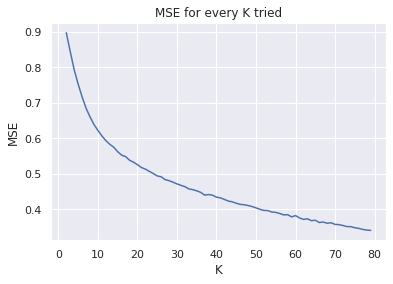

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

mses_per_k = []
K_to_try = np.arange(2, 80)
for k in K_to_try:
    means = KMeans(k)
    predictions = means.fit_predict(customer_data_scaled)
    mses = []
    for i in range(len(predictions)):
        cluster_center = means.cluster_centers_[predictions[i]]
        point = customer_data_scaled.iloc[i]
        mses.append(mean_squared_error(cluster_center, point))
    
    mses_per_k.append(np.mean(mses))

plt.plot(K_to_try, mses_per_k)
plt.ylabel('MSE')
plt.xlabel('K')
plt.title('MSE for every K tried')

In [86]:
k = 4
k_means = KMeans(k)
k_means.fit(customer_data_scaled)
predictions = k_means.predict(customer_data_scaled)

In [87]:
customer_data_scaled['cluster'] = predictions
customer_data_scaled

APAC        EU     LATAM      EMEA    Africa  \
Customer Name                                                          
Aaron Bergman       1.755830  0.882893 -0.477146 -0.466969 -0.378460   
Aaron Hawkins      -0.398228 -0.207808  0.346044 -0.404466  0.903322   
Aaron Smayling     -1.465513  2.643070 -0.924125  0.040556  0.458334   
Adam Bellavance    -0.256969 -1.113381  0.865974 -0.142688 -0.274586   
Adam Hart          -0.131406  0.504912 -1.290772 -1.146170  1.914656   
...                      ...       ...       ...       ...       ...   
Xylona Preis        0.356308 -1.168227 -1.125481 -1.006340 -0.409756   
Yana Sorensen      -1.495638 -0.028479  2.227855 -0.009688 -0.975803   
Yoseph Carroll     -1.198692  3.854693 -0.636046 -1.517021 -0.613680   
Zuschuss Carroll   -0.421771  1.457440 -0.783937 -1.517021 -1.323994   
Zuschuss Donatelli -0.324111  0.758323 -1.596311  1.078941  1.307855   

                          US    Canada  Office Supplies  Technology  \
Customer Name                                                         
Aaron Bergman      -1.472604 -0.435035        -2.296165    2.519357   
Aaron Hawkins       0.017686 -0.435035        -2.125699    0.324184   
Aaron Smayling     -0.326108 -0.435035         0.948253    0.043075   
Adam Bellavance     0.806390 -0.435035         1.356558   -1.577433   
Adam Hart           0.498997  0.274477         0.154975   -0.378588   
...                      ...       ...              ...         ...   
Xylona Preis        3.050964 -0.435035         1.312381   -0.989192   
Yana Sorensen      -0.015585 -0.435035         0.589998   -0.083877   
Yoseph Carroll     -0.601144  1.693501        -0.043344   -0.729973   
Zuschuss Carroll    1.961538 -0.435035         0.033650    0.274576   
Zuschuss Donatelli -0.326108 -0.435035        -2.445214    2.302355   

                    Furniture     Sales  Order Freq  cluster  
Customer Name                                                 
Aaron Bergman        0.193635  1.679065    0.839271        1  
Aaron Hawkins        2.195082  0.932865    0.027109        1  
Aaron Smayling      -1.167613 -0.324571    0.666360        2  
Adam Bellavance     -0.025043  0.822862    0.429728        3  
Adam Hart            0.196278  1.116997   -1.311070        2  
...                       ...       ...         ...      ...  
Xylona Preis        -0.563152 -0.711331   -1.158172        2  
Yana Sorensen       -0.615381  0.793218   -0.486380        3  
Yoseph Carroll       0.784161  0.818560    1.107563        0  
Zuschuss Carroll    -0.315527  2.415709   -1.370148        1  
Zuschuss Donatelli   0.588200 -0.666844   -0.766360        1  

[795 rows x 13 columns]

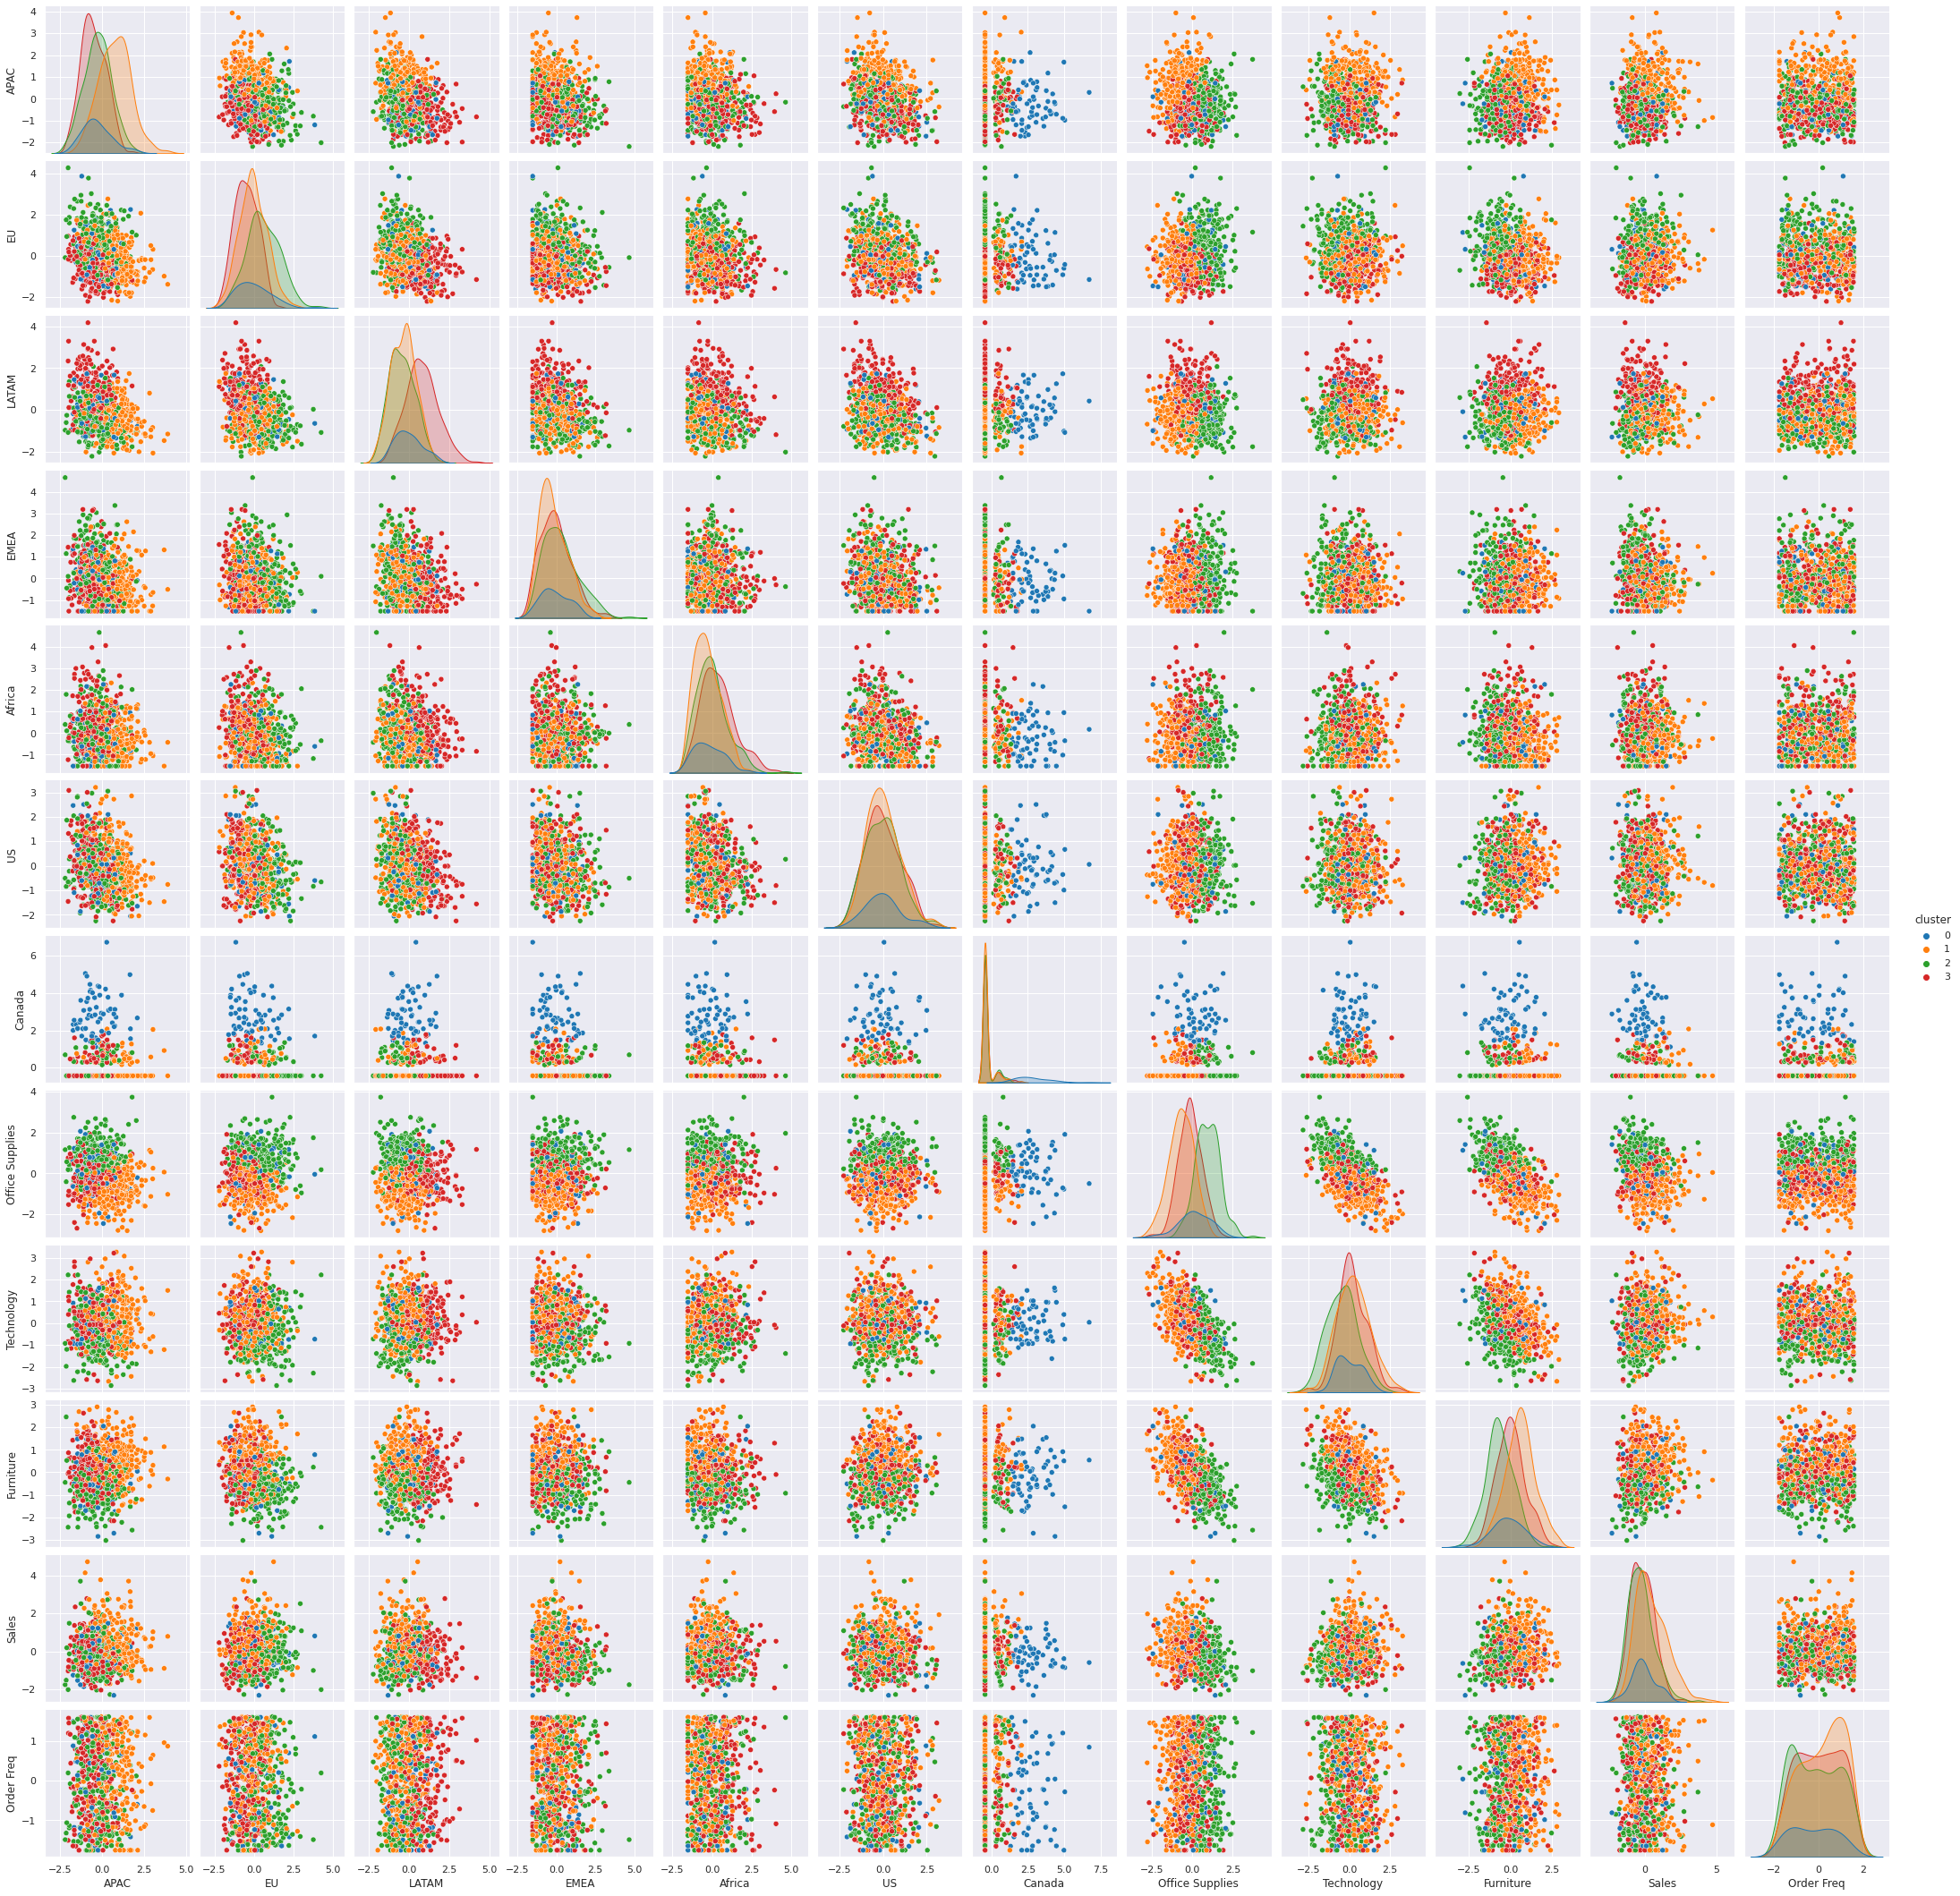

In [91]:
sns.pairplot(customer_data_scaled, hue='cluster', palette='tab10')

In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
customer_data_for_visualization = pd.DataFrame(pca.fit_transform(customer_data_scaled.drop(columns='cluster')), columns=['var1', 'var2'], index=customer_data_scaled.index)
customer_data_for_visualization['cluster'] = predictions
customer_data_for_visualization

var1      var2  cluster
Customer Name                                  
Aaron Bergman      -3.389540  2.703820        1
Aaron Hawkins      -2.789647 -0.620803        1
Aaron Smayling      2.163247  1.577717        2
Adam Bellavance     0.933091 -1.680485        3
Adam Hart          -0.008472  0.509175        2
...                      ...       ...      ...
Xylona Preis        1.284508 -2.018094        2
Yana Sorensen       0.577381 -0.126273        3
Yoseph Carroll      0.455099  0.764852        0
Zuschuss Carroll   -0.556491  0.219383        1
Zuschuss Donatelli -1.904668  1.711954        1

[795 rows x 3 columns]

<AxesSubplot:xlabel='var1', ylabel='var2'>

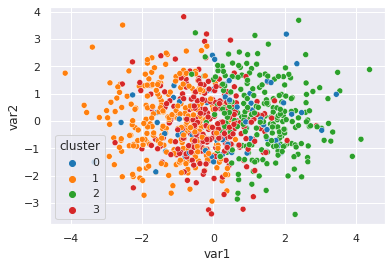

In [94]:
sns.scatterplot(x='var1', y='var2', hue='cluster', data=customer_data_for_visualization, palette='tab10')

In [99]:
customer_data[customer_data_scaled['cluster'] != 0]

APAC        EU     LATAM      EMEA    Africa  \
Customer Name                                                          
Aaron Bergman       0.370787  0.269663  0.157303  0.067416  0.067416   
Aaron Hawkins       0.178571  0.178571  0.232143  0.071429  0.142857   
Aaron Smayling      0.083333  0.416667  0.116667  0.100000  0.116667   
Adam Bellavance     0.191176  0.102941  0.279412  0.088235  0.073529   
Adam Hart           0.202381  0.238095  0.083333  0.023810  0.202381   
...                      ...       ...       ...       ...       ...   
William Brown       0.238095  0.095238  0.166667  0.047619  0.011905   
Xylona Preis        0.245902  0.098361  0.098361  0.032787  0.065574   
Yana Sorensen       0.080645  0.193548  0.403226  0.096774  0.032258   
Zuschuss Carroll    0.176471  0.317647  0.129412  0.000000  0.011765   
Zuschuss Donatelli  0.185185  0.259259  0.055556  0.166667  0.166667   

                          US    Canada  Office Supplies  Technology  \
Customer Name                                                         
Aaron Bergman       0.067416  0.000000         0.471910    0.325843   
Aaron Hawkins       0.196429  0.000000         0.482143    0.214286   
Aaron Smayling      0.166667  0.000000         0.666667    0.200000   
Adam Bellavance     0.264706  0.000000         0.691176    0.117647   
Adam Hart           0.238095  0.011905         0.619048    0.178571   
...                      ...       ...              ...         ...   
William Brown       0.440476  0.000000         0.595238    0.202381   
Xylona Preis        0.459016  0.000000         0.688525    0.147541   
Yana Sorensen       0.193548  0.000000         0.645161    0.193548   
Zuschuss Carroll    0.364706  0.000000         0.611765    0.211765   
Zuschuss Donatelli  0.166667  0.000000         0.462963    0.314815   

                    Furniture        Sales  Order Freq  
Customer Name                                           
Aaron Bergman        0.202247  24644.62750       64800  
Aaron Hawkins        0.303571  20759.51384       44509  
Aaron Smayling       0.133333  14212.62840       60480  
Adam Bellavance      0.191176  20186.77840       54568  
Adam Hart            0.202381  21718.20142       11076  
...                       ...          ...         ...  
William Brown        0.202381  16887.19320       65936  
Xylona Preis         0.163934  12198.95060       14896  
Yana Sorensen        0.161290  20032.43800       31680  
Zuschuss Carroll     0.176471  28479.99226        9600  
Zuschuss Donatelli   0.222222  12430.57040       24685  

[729 rows x 12 columns]